In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### style

In [55]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

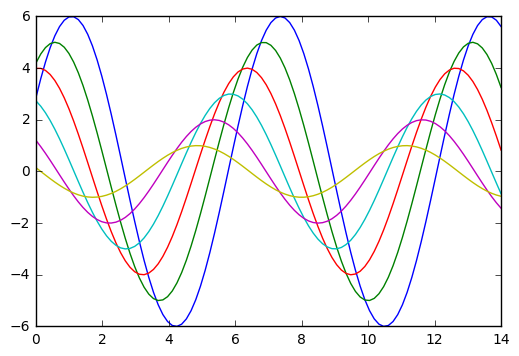

In [3]:
sinplot()

In [56]:
import seaborn as sns

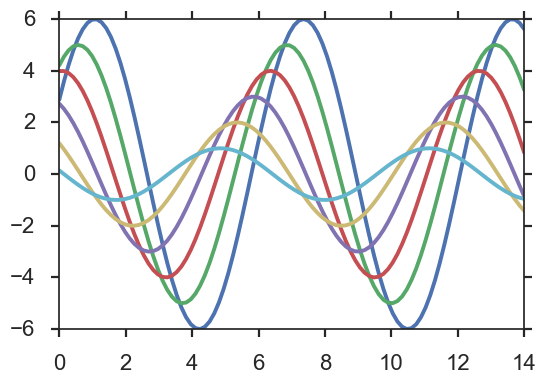

In [57]:
sinplot()

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

set_style(),axes_style() 

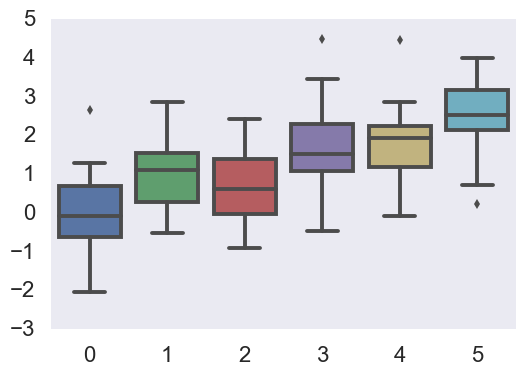

In [59]:
sns.set_style("dark")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

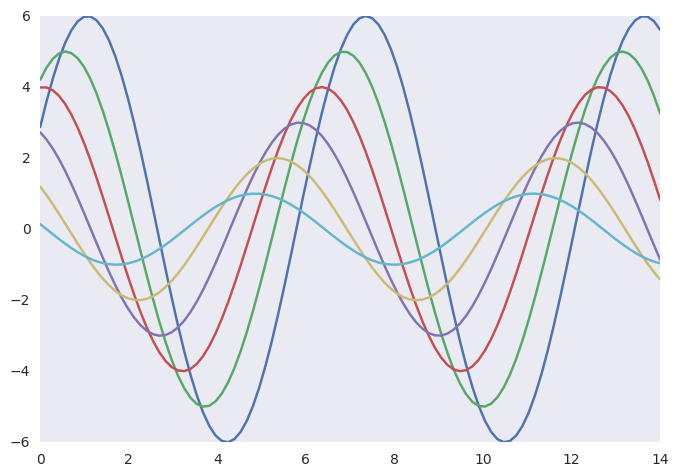

In [9]:
sns.set_style("dark")
sinplot()

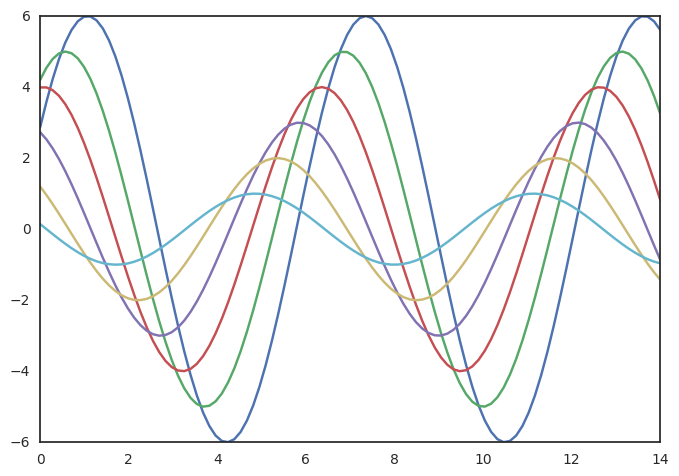

In [10]:
sns.set_style("white")
sinplot()

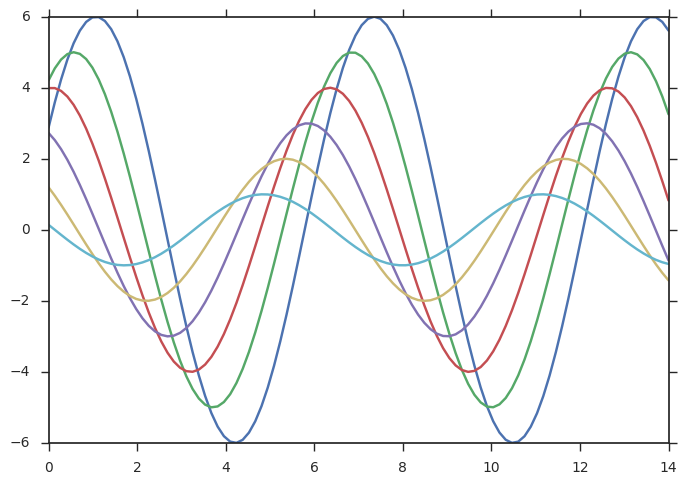

In [11]:
sns.set_style("ticks")
sinplot()

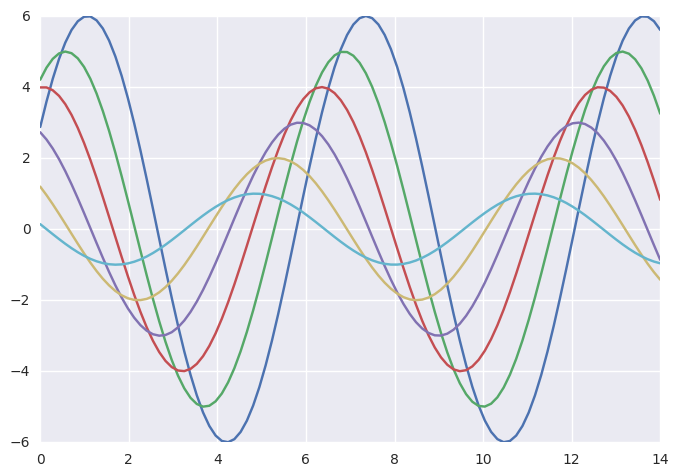

In [12]:
sns.set_style("darkgrid")
sinplot()

### spine

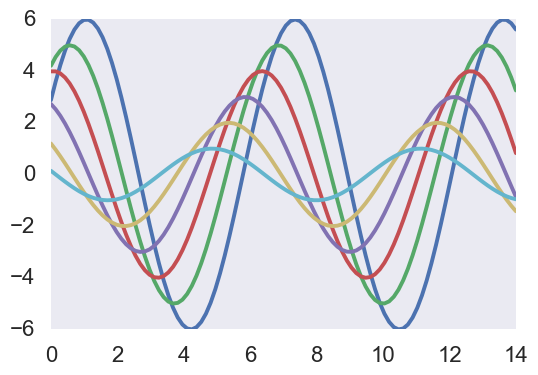

In [61]:
sinplot()
#sns.despine()

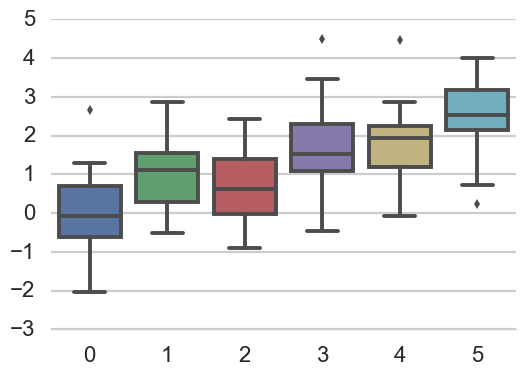

In [64]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

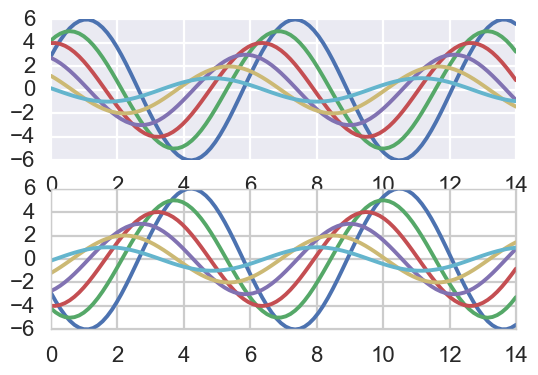

In [65]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [16]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

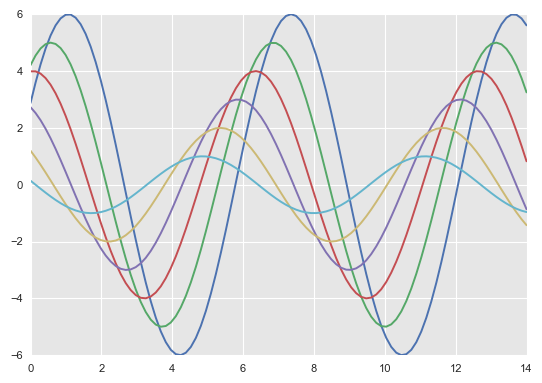

In [25]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

### context

+ paper
+ notebook
+ talk
+ poster

 plotting_context(), set_context()

In [28]:
sns.plotting_context()

{'axes.labelsize': 16.5,
 'axes.titlesize': 18.0,
 'figure.figsize': [8.0, 5.5],
 'font.size': 18.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 15.0,
 'lines.linewidth': 2.5,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 15.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 15.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

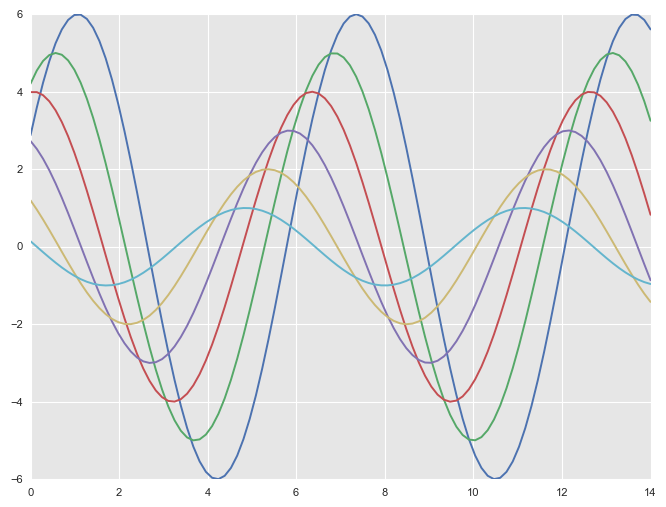

In [22]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

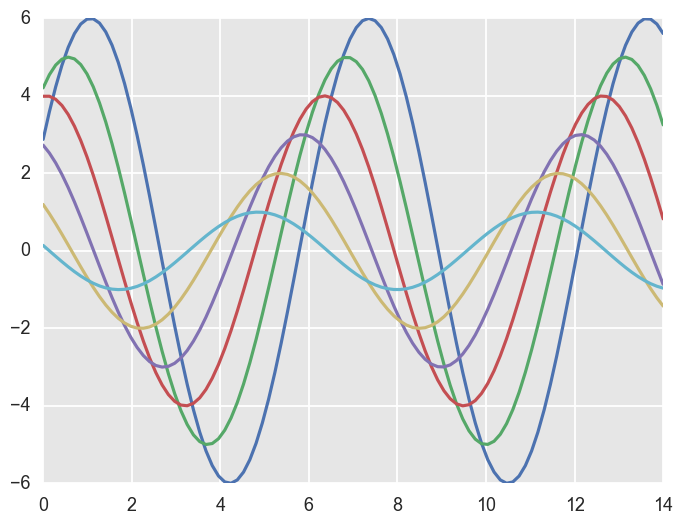

In [26]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

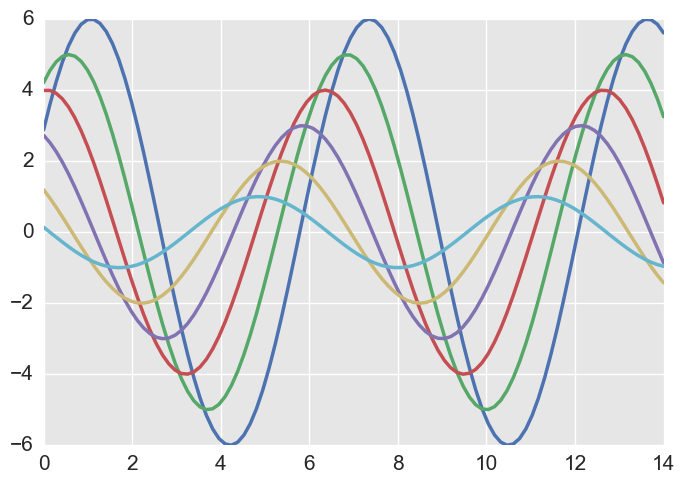

In [27]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

## tips

In [92]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### scatterplot

In [104]:
sns.regplot?

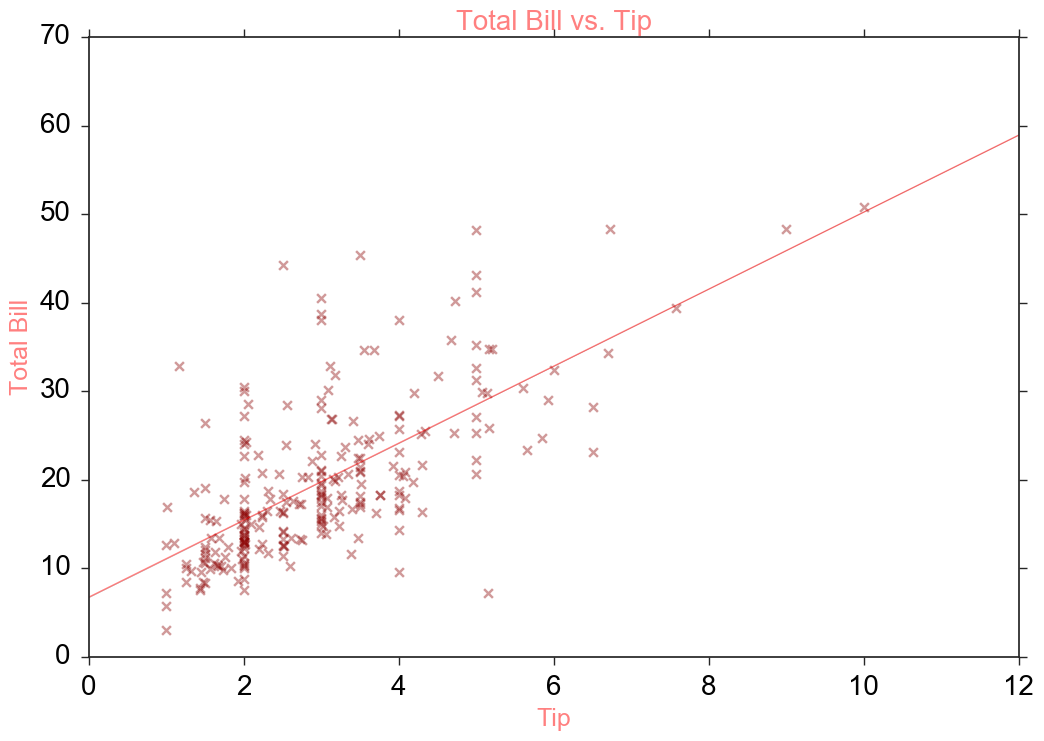

In [105]:
sns.set(style="ticks")


g = sns.regplot(x="tip", y="total_bill", data=tips, ci = False, 
    scatter_kws={"color":"darkred","alpha":0.4,"s":40},
    line_kws={"color":"r","alpha":0.5,"lw":1},marker="x")

# 去掉右边以及上部的spine
#sns.despine()

g.figure.set_size_inches(12,8)
g.axes.set_title('Total Bill vs. Tip', fontsize=20,color="r",alpha=0.5)
g.set_xlabel("Tip",size = 18,color="r",alpha=0.5)
g.set_ylabel("Total Bill",size = 18,color="r",alpha=0.5)
g.tick_params(labelsize=20,labelcolor="black")

In [117]:
plt.subplots_adjust?

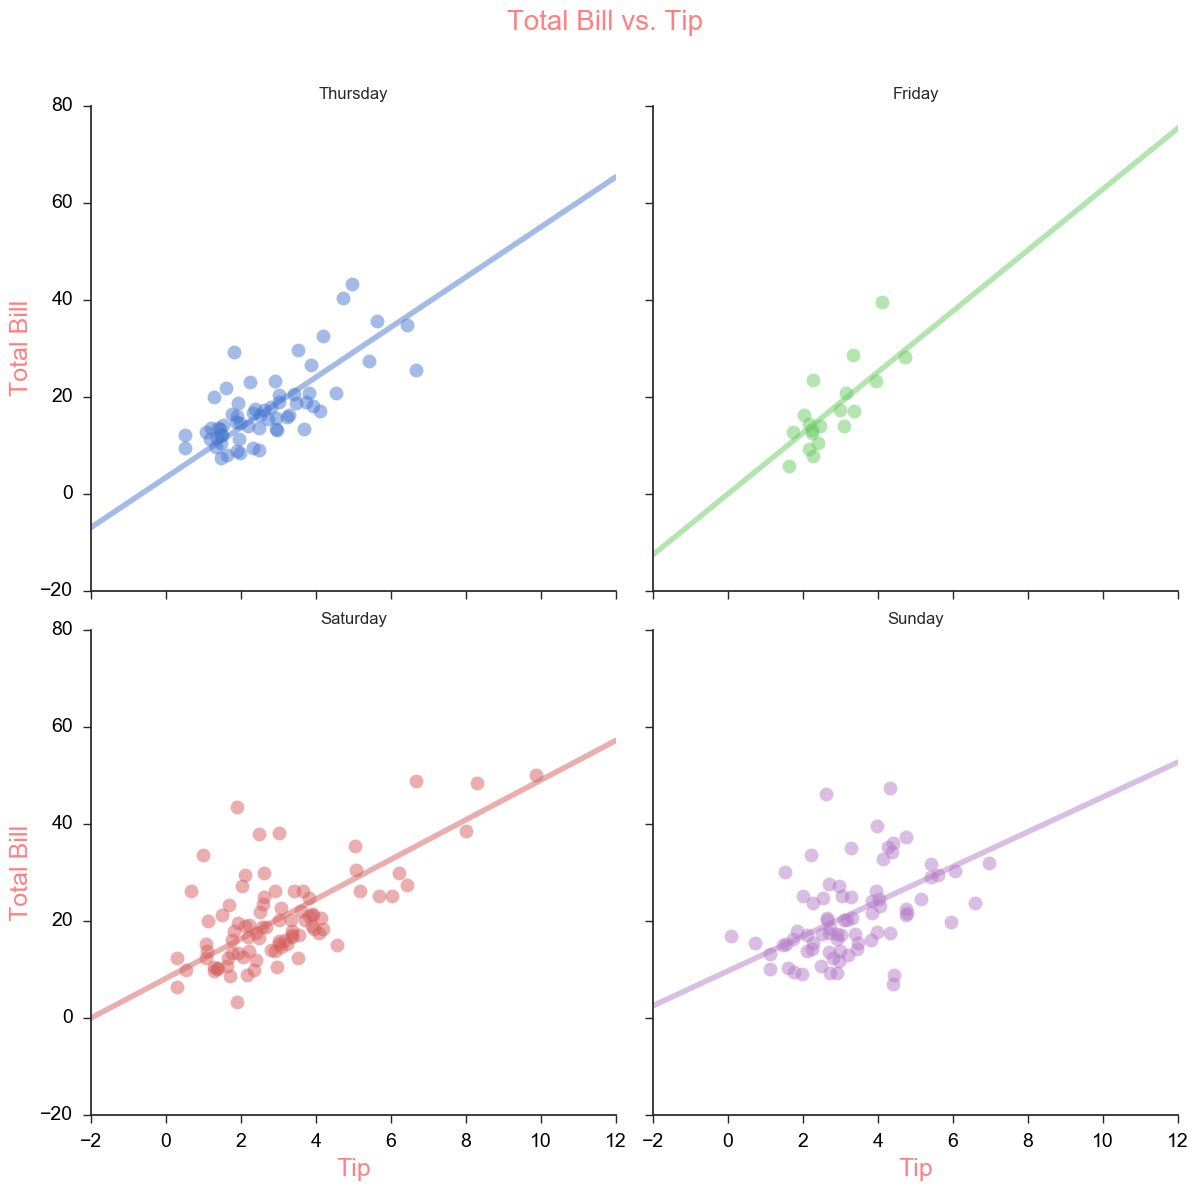

In [116]:
# lmplot for faceted plot

# col : 按天分别绘图
# palette: deep, muted, pastel, bright, dark, colorblind.
# col_wrap: 每行2个图
# scatter_kws: points的属性
# hue: 每列数据对应的颜色
# size: graph size

g = sns.lmplot(x="tip", y="total_bill",ci=None,data=tips, col="day",
    palette="muted",col_wrap=2,scatter_kws={"s": 100,"alpha":.5},
    line_kws={"lw":4,"alpha":0.5},hue="day",x_jitter=1.0,y_jitter=1.0,size=6)

sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Title
g.fig.suptitle('Total Bill vs. Tip', fontsize=20,color="r",alpha=0.5)

# Set the xlabel
g.set_xlabels("Tip",size = 18,color="r",alpha=0.5)

# ylabel
g.set_ylabels("Total Bill",size = 18,color="r",alpha=0.5)

# ticklabel size and color
titles = ['Thursday','Friday','Saturday','Sunday']
for ax,title in zip(g.axes.flat,titles):
    ax.tick_params(labelsize=14,labelcolor="black")
    ax.set_title(title)

In [118]:
g.axes.flat

### barplots

In [66]:
sns.barplot?

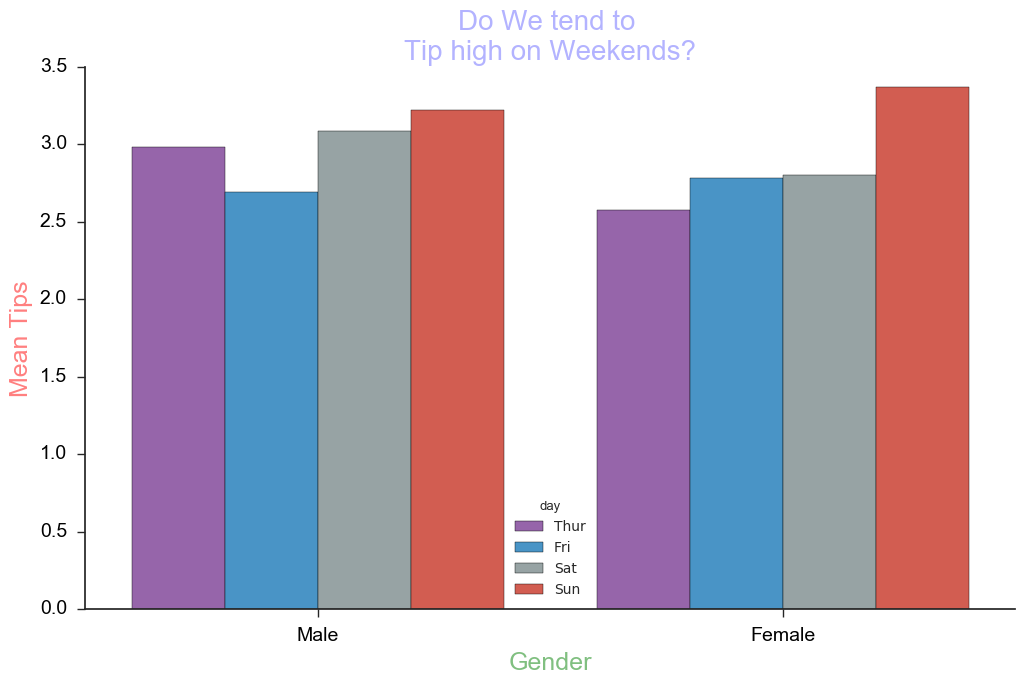

In [68]:
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# custom palette 
g = sns.barplot(x="sex", y="tip",  hue="day",
    palette=sns.color_palette(flatui),data=tips,ci=None)

sns.despine()

g.figure.set_size_inches(12,7)

g.axes.set_title('Do We tend to \nTip high on Weekends?', 
    fontsize=20,color="b",alpha=0.3)

g.set_xlabel("Gender",size = 18,color="g",alpha=0.5)

g.set_ylabel("Mean Tips",size = 18,color="r",alpha=0.5)

g.tick_params(labelsize=14,labelcolor="black")

### 直方图/分布图

C:\Anaconda\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


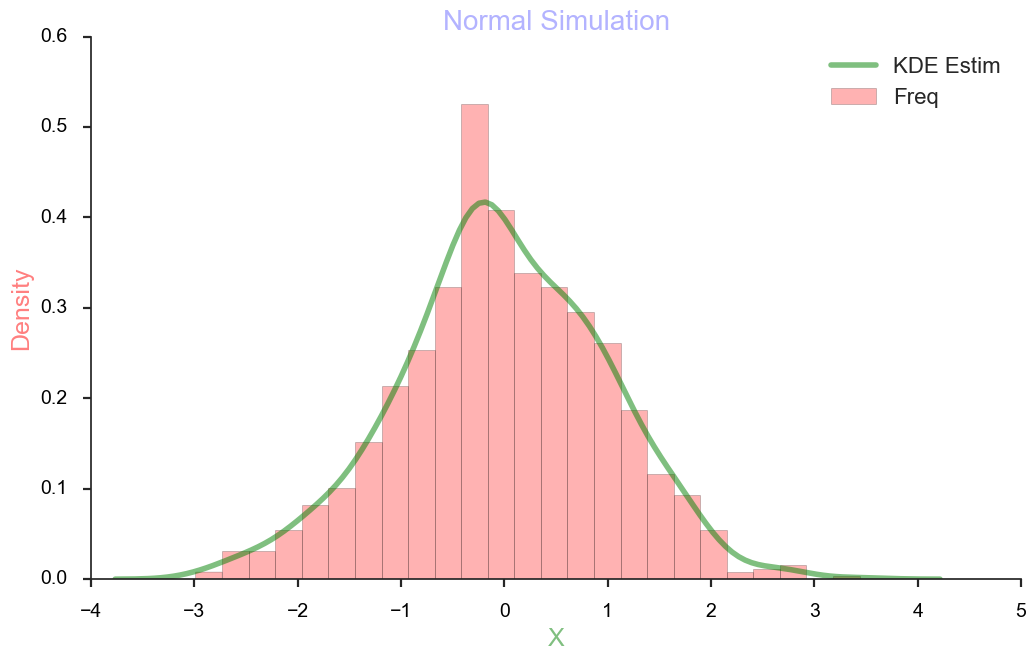

In [48]:
#distplot组合了matplotlib的hist()和seaborn的kdeplot()
# Create a list of 1000 Normal RVs
x = np.random.normal(size=1000)

sns.set_context("poster")
sns.set_style("ticks")

# 缺省直方图,kde=False norm_hist=False

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})

sns.despine()

g.figure.set_size_inches(12,7)
g.axes.set_title('Normal Simulation', fontsize=20,color="b",alpha=0.3)
g.set_xlabel("X",size = 18,color="g",alpha=0.5)
g.set_ylabel("Density",size = 18,color="r",alpha=0.5)
g.tick_params(labelsize=14,labelcolor="black")

### iris

In [124]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


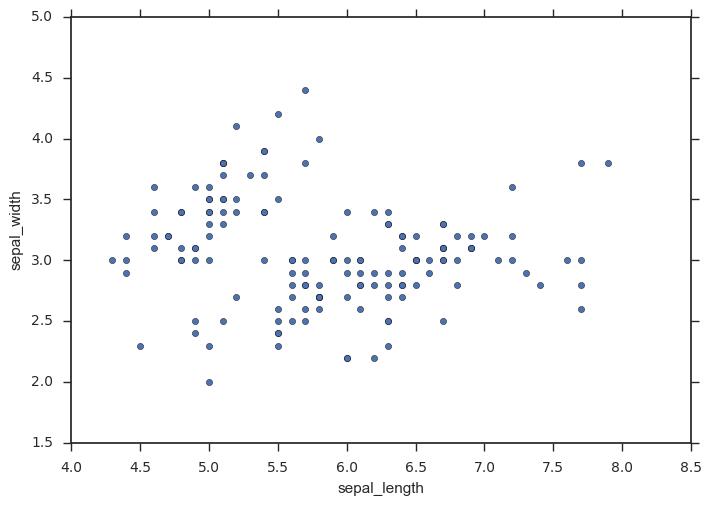

In [77]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

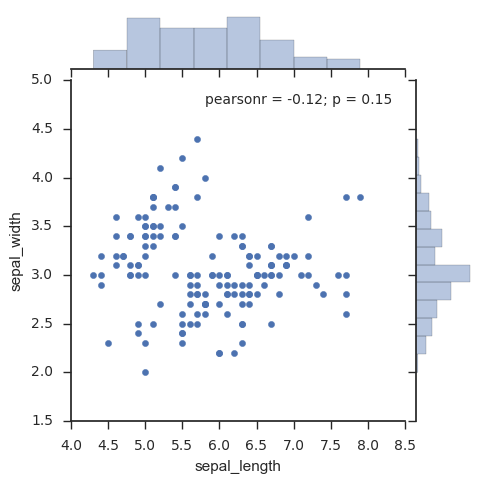

In [78]:
sns.jointplot(x="sepal_length", y="sepal_width",data=iris,size=5)

In [125]:
sns.FacetGrid?

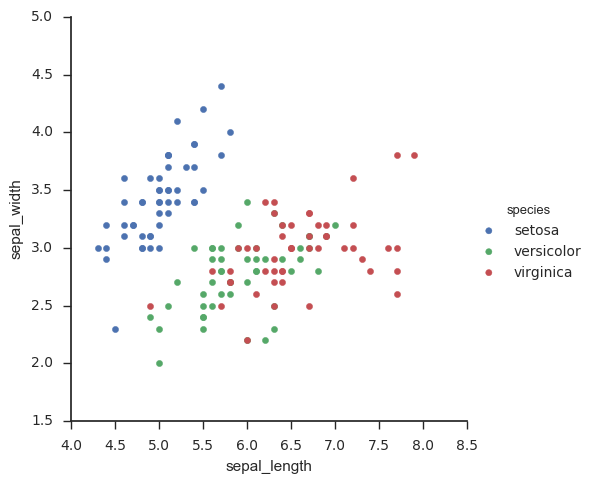

In [120]:
sns.FacetGrid(iris, hue="species", size=5).map(plt.scatter,"sepal_length", "sepal_width").add_legend()

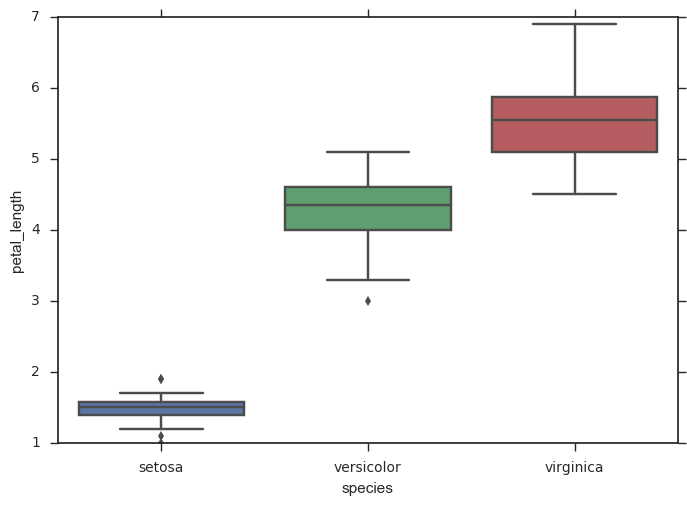

In [80]:
sns.boxplot(x="species", y="petal_length", data=iris)

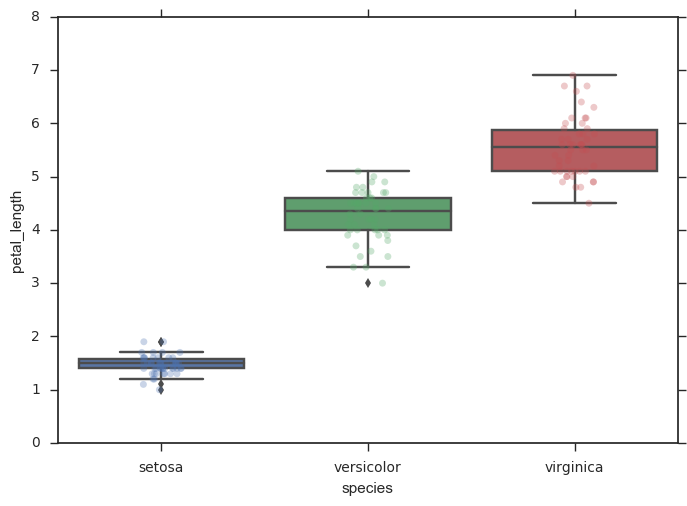

In [126]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray",alpha=0.3)

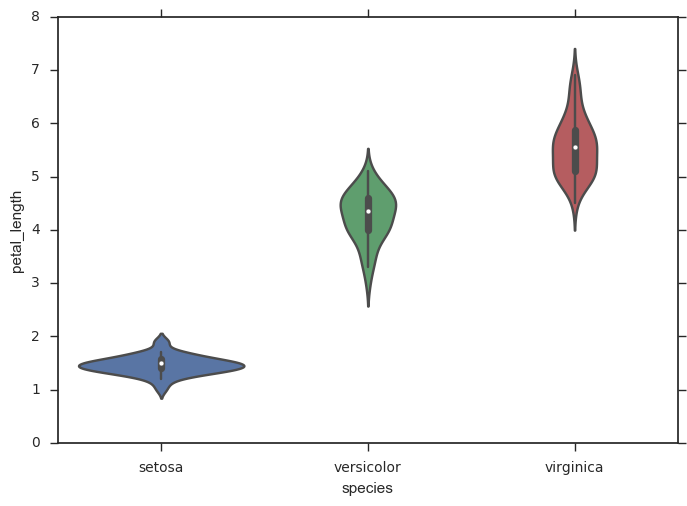

In [82]:
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

C:\Anaconda\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


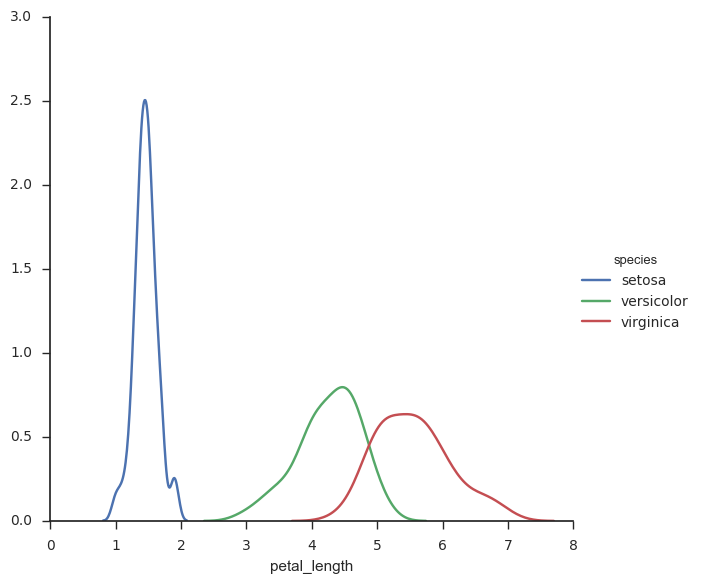

In [121]:
sns.FacetGrid(iris, hue="species", size=6).map(sns.kdeplot, "petal_length") .add_legend()

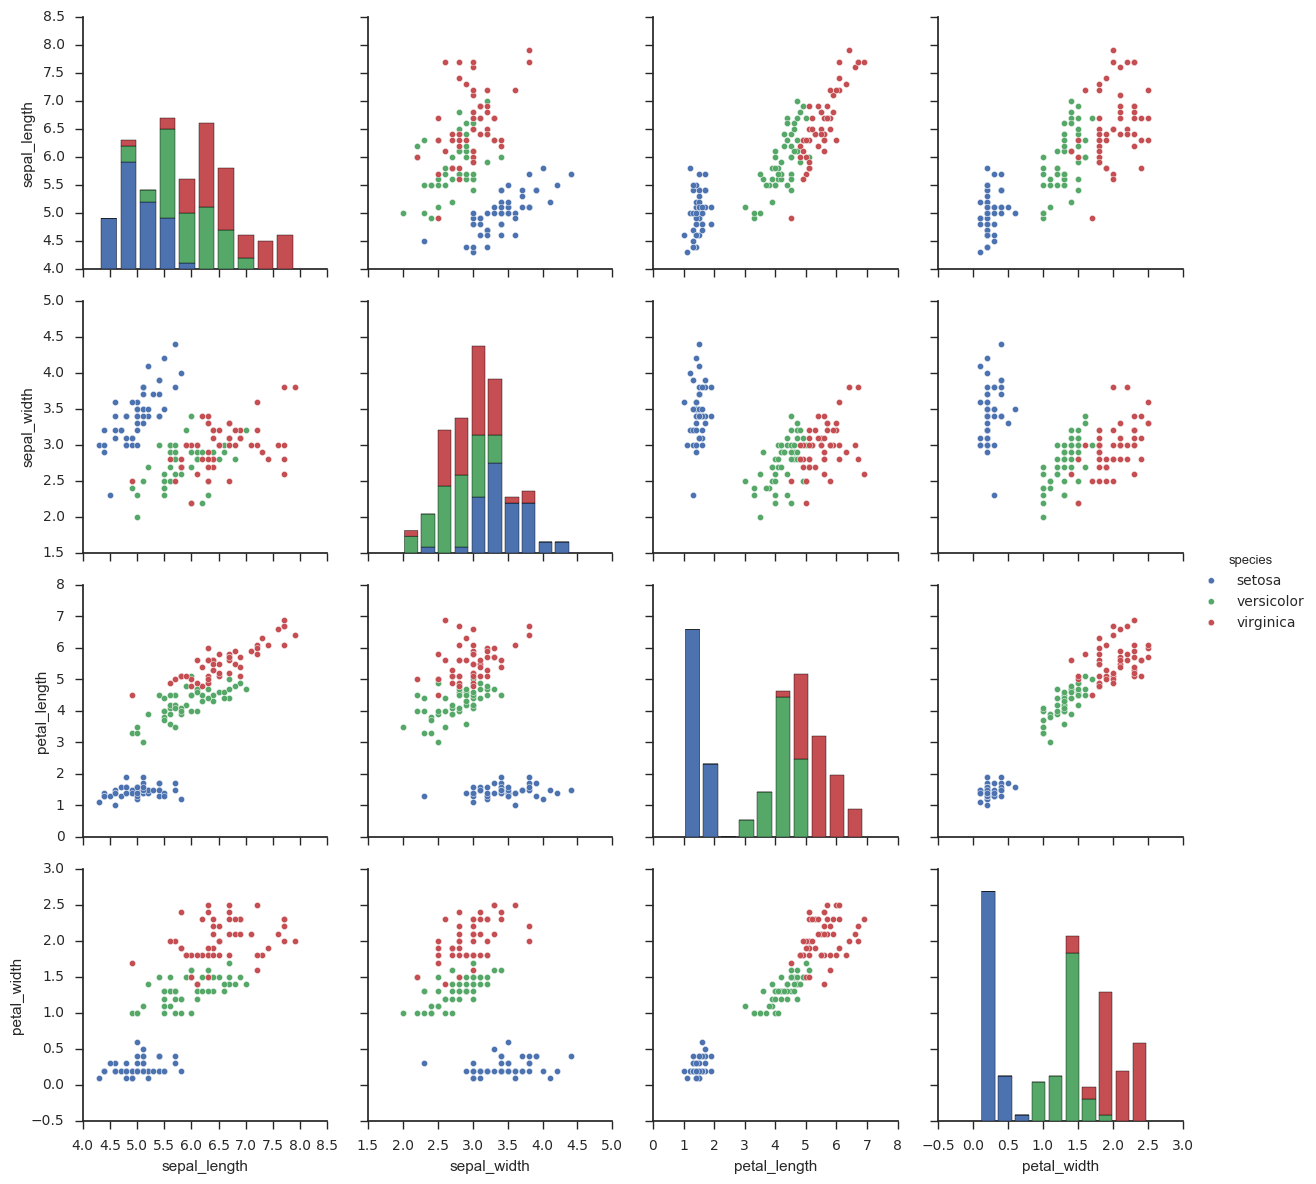

In [127]:
sns.pairplot(iris, hue="species", size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C47EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017097940>]], dtype=object)

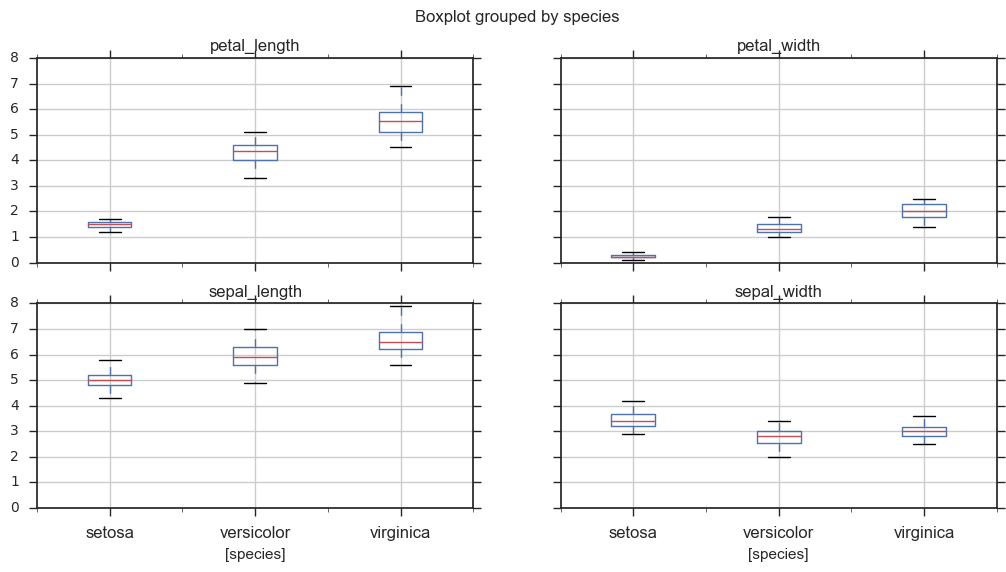

In [85]:
iris.boxplot(by="species", figsize=(12, 6))